# TP2-AS

03/12/2018            

In [2]:
import numpy as np 
np.set_printoptions(threshold=np.nan,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore') 

# Chargement des données et préparation

In [5]:
creditScoring = pd.read_csv(r'credit_scoring.csv',sep=';')


In [117]:
#Conversion en nympy Array
X = creditScoring.ix[:, 1:12].values
Y = creditScoring.ix[:, 13].values 


In [7]:
# Analyser le nombre de variable
X.shape[0] #récuperer le nombre de ligne de la base de connaissance

4375

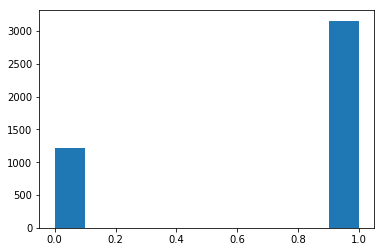

In [8]:
# Nombre d'exemple négatifs et négatifs
plt.hist(Y)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, train_size=0.5)
X_train.shape[0]


2187

# Apprentissage et évaluation de modèles

In [12]:
#k-plus-proches-voisins avec k=5 
from sklearn import neighbors, tree

# L'arbre de décision
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(X_train, Y_train)

# Knn 
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve

PredictKnn = knn.predict(X_test)
Predictclf = clf.predict(X_test)

print("Accuracy")
accuracyknn = accuracy_score(Y_test, PredictKnn) # l'accuracy pour le Knn 
accuracyclf = accuracy_score(Y_test, Predictclf) #l'accuracy pour l'arbred de décision 

print('accuracy avec knn: %f' % accuracyknn)
print('accuracy avec clf: %f' % accuracyclf)


Accuracy
accuracy avec knn: 0.703839
accuracy avec clf: 0.696984


In [11]:
print("la précision ")
precisionKnn  = precision_score(Y_test, PredictKnn)
precisionclf =  precision_score(Y_test, Predictclf)

print('la précision avec knn: %f' % precisionKnn)
print('la précision avec clf: %f' % precisionclf)

la précision 
la précision avec knn: 0.759737
la précision avec clf: 0.794889


In [14]:
print("le rappel ")
RecallKnn  = recall_score(Y_test, PredictKnn)
Recallclf =  recall_score(Y_test, Predictclf)

print('le rappel avec knn: %f' % RecallKnn)
print('la rappel avec clf: %f' % Recallclf)

le rappel 
le rappel avec knn: 0.870394
la rappel avec clf: 0.778272


In [13]:
#Interprétation 


# Normalisation des variables continues 

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#StandardScala
std =StandardScaler()
std.fit(X_train)
X_train_norm = std.transform(X_train)
X_test_norm = std.transform(X_test)

In [16]:
# knn et clf avec les données normalisées StandarScaler

#Créer une fonction pour automatiser le traitement
def KnnClf(X_train,X_test,Y_train, Y_test):
    
        # L'arbre de décision
    clf = tree.DecisionTreeClassifier(random_state=1)
    clf.fit(X_train, Y_train)

            # Knn 
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, Y_train)
    
    #les prédiction sur la base de test
    PredictKnn = knn.predict(X_test)
    Predictclf = clf.predict(X_test)
    
    #les accuracy
    accuracyknn = accuracy_score(Y_test, PredictKnn) # l'accuracy pour le Knn 
    accuracyclf = accuracy_score(Y_test, Predictclf) #l'accuracy pour l'arbred de décision 
    
    #La précision
    precisionKnn  = precision_score(Y_test, PredictKnn)
    precisionclf =  precision_score(Y_test, Predictclf)
    
    #Le Recall
    RecallKnn  = recall_score(Y_test, PredictKnn)
    Recallclf =  recall_score(Y_test, Predictclf)
    
#     scores = [[accuracyknn ,precisionKnn,RecallKnn], [accuracyclf,precisionclf, Recallclf]]
    print("Knn")
    print('accuracy avec knn: %f' % accuracyknn)
    print('la précision avec knn: %f' % precisionKnn)
    print('le rappel avec knn: %f' % RecallKnn)
    
    print("CLF")
    print('accuracy avec clf: %f' % accuracyclf)
    print('la précision avec clf: %f' % precisionclf)
    print('la rappel avec clf: %f' % Recallclf)
   
    
#     plt.hist(scores)
#     plt.show()
    

In [17]:
KnnClf(X_train, X_test, Y_train, Y_test)

Knn
accuracy avec knn: 0.703839
la précision avec knn: 0.755237
le rappel avec knn: 0.870394
CLF
accuracy avec clf: 0.696984
la précision avec clf: 0.795971
la rappel avec clf: 0.778272


In [18]:
# Application des algos sur les données normalisées

#Avec StandardScaler
print("StandardScaler")
KnnClf(X_train_norm, X_test_norm, Y_train, Y_test )


StandardScaler
Knn
accuracy avec knn: 0.749543
la précision avec knn: 0.797909
le rappel avec knn: 0.872935
CLF
accuracy avec clf: 0.695155
la précision avec clf: 0.795825
la rappel avec clf: 0.775095


# 4 Création de nouvelles variables caractéristiques par combinaisons linéaires des variables initiales 

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca.fit(X_train_norm)

X_train_pca = pca.transform(X_train_norm)
X_test_pca= pca.transform(X_test_norm)


X_train_cont = np.concatenate((X_train_norm,X_train_pca), axis=1)
X_test_cont = np.concatenate((X_test_norm,X_test_pca), axis=1)

KnnClf(X_train_cont,X_test_cont,Y_train, Y_test)

Knn
accuracy avec knn: 0.746344
la précision avec knn: 0.797431
le rappel avec knn: 0.867853
CLF
accuracy avec clf: 0.717093
la précision avec clf: 0.803947
la rappel avec clf: 0.802414


# 5 Sélection de variables

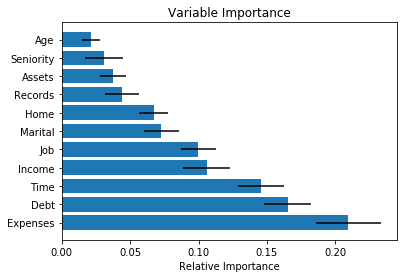

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators=100)
clf1.fit(X_train_norm, Y_train)
importances=clf1.feature_importances_ 
std = np.std([tree.feature_importances_ for tree in clf1.estimators_],axis=0) 
 
sorted_idx = np.argsort(importances)[::-1] 
 
features = creditScoring.columns.drop("Status")
# print(features[sorted_idx]) 

padding = np.arange(X_train_norm.size/len(X_train_norm)) + 0.5

plt.barh(padding, importances[sorted_idx], xerr=std[sorted_idx], align='center')

plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show() 
 
 

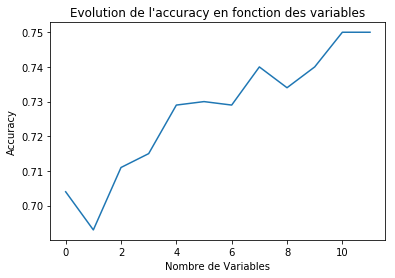

In [21]:
# Déterminer ensuite le nombre de variables à garder en exécutant le code suivant 

KNN=neighbors.KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(X_train_norm.shape[1]+1) 
for f in np.arange(0, X_train_norm.shape[1]+1):
    X1_f = X_train_norm[:,sorted_idx[:f+1]]
    X2_f = X_test_norm[:,sorted_idx[:f+1]]
    KNN.fit(X1_f,Y_train)
    YKNN=KNN.predict(X2_f)
    scores[f]=np.round(accuracy_score(Y_test,YKNN),3) 

    
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show() 

# 6. Paramétrage des classifieurs 

In [22]:
from sklearn.model_selection import GridSearchCV

parameters1 = {'n_neighbors':[4,5,6,8,9]}
knn = neighbors.KNeighborsClassifier()
GS1 = GridSearchCV(knn, parameters1, scoring='accuracy', cv=10) #GS1 est le GridSearchCV applique le knn
GS1.fit( X_train_norm, Y_train)
print(GS1.best_params_)


# pour le decision tree
parameters2= {'criterion':['gini', 'entropy'], 'max_depth':[10]}
clf = tree.DecisionTreeClassifier(random_state=1)
GS2 =  GridSearchCV(clf, parameters2, scoring='accuracy', cv=10) #GS1 est le GridSearchCV applique le decision tree
GS2.fit(X_train_norm, Y_train)

#Afficher les meilleurs parametre pour chaque  classifieur
print(GS2.best_params_)




{'n_neighbors': 9}
{'criterion': 'entropy', 'max_depth': 10}


In [23]:
# Afficher les accuracy de GridSearch (GS1, et GS2)
predictGS1 = GS1.predict(X_test_norm)
accuracyGS1 = recall_score(Y_test, predictGS1)
print('accuracy avec knn: %f' %  + accuracyGS1)

predictGS2 = GS2.predict(X_test_norm)
accuracyGS2 = recall_score(Y_test, predictGS2)
print('accuracy avec clf: %f' %  + accuracyGS2)


accuracy avec knn: 0.884371
accuracy avec clf: 0.845616


# 7 Création d’un pipeline

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
normalistaion =StandardScaler()

#pipeline pour l'automatisatio du traitement
pipeline = Pipeline([('normalistaion', StandardScaler()),
                     ("PCA",FeatureUnion([("F2",PCA(n_components=3))])),
                     ("Knn", KNeighborsClassifier(n_neighbors =9))])
pipeline.fit(X_train, Y_train)

predict1 = pipeline.predict(X_test)

pipeline2 = Pipeline([('normalistaion', StandardScaler()),
                     ("PCA",FeatureUnion([("F2",PCA(n_components=3))])),
                     ("clf", DecisionTreeClassifier(max_depth=10, random_state=1) )])
pipeline2.fit(X_train, Y_train)

predict2 = pipeline2.predict(X_test)


# 8. Comparaison de plusieurs algorithmes d’apprentissage 

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Ici nous allons tester 4 algorithmes de classififcation
def run_classifier(X_train_norm, Y_train):
    clfs = {    
        'RF': RandomForestClassifier(n_estimators=50), 
        'KNN': KNeighborsClassifier(n_neighbors=9),
        'clf': DecisionTreeClassifier(max_depth=10, random_state=1),
        'gnb': GaussianNB()
         } 
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    
    for i in clfs: 
        clf = clfs[i] 
        cv_acc = cross_val_score(clf, X_train_norm, Y_train, cv=kf, scoring='roc_auc') 
        print("L'auc for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc))) 


# II. Apprentissage supervisé : Données hétérogènes 

                        1 Chargement des données et préparation 

In [27]:
#Récupération des données de credit.data
data = pd.read_csv('credit.data',sep="\t", header=None )

data.head(20) # Afficher 20 ligne pour annalyser la structure des données

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52,1442,+


In [29]:
Clean_data = data.ix[:,0:15].replace('?', np.NAN)
#Supprimer les lignes contenant des données manquantes
Clean_data.dropna(inplace=True)
Clean_data.shape

(653, 16)

In [116]:
#choisir les variables numériques
col_num =[1,2,10,13,14]
X_num =np.copy(Clean_data.ix[:, col_num].values)


In [115]:
# Cinversion et sépartion des variables
Y_data = Clean_data.ix[:, 15].values
X_num = X_num.astype(float)
#binerisation
Y_num= [1 if y=="+"  else 0 for y in Y_data]




In [84]:
#Test sur les données brutes
run_classifier(X_num, Y_num)

L'auc for RF is: 0.811 +/- 0.072
L'auc for KNN is: 0.726 +/- 0.058
L'auc for clf is: 0.709 +/- 0.066
L'auc for gnb is: 0.781 +/- 0.070


In [85]:
run_classifier(X_num, Y_num)

L'auc for RF is: 0.794 +/- 0.071
L'auc for KNN is: 0.726 +/- 0.058
L'auc for clf is: 0.709 +/- 0.066
L'auc for gnb is: 0.781 +/- 0.070


In [34]:
# Normalisation des données
def normalisation1(X):
    std =StandardScaler()
    std.fit(X)
    X_norm = std.transform(X)
    
    return X_norm


In [86]:
# Test sur les données normalisées
X_num_norm = normalisation1(X_num)
run_classifier(X_num_norm, Y_num)

L'auc for RF is: 0.800 +/- 0.069
L'auc for KNN is: 0.792 +/- 0.062
L'auc for clf is: 0.709 +/- 0.066
L'auc for gnb is: 0.781 +/- 0.070


 Nous avons constaté une augmentation des accuracy de chaque modèle après avoir normalisé les données. Donc les données normalisées permttent d'avoir de bonne prédiction.

    2-Nous allons maintenant considérer la totalité de la base originale comportant les 15 variables continues et catégorielles  mais aussi les données manquantes

In [114]:
# Inputation d'une variable
from sklearn.preprocessing import Imputer, OneHotEncoder
col_cat = [0,3,4,5,6,7,8,9,11,12]
X_cat = np.copy(data.ix[:,col_cat ])
for col_id in range(len(col_cat)):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx 

imp_cat = Imputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])



In [37]:
#Traitement de variables catégorielles 
X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray() 


In [113]:
#Pour les variables numériques
X_num2 = np.copy(data.ix[:, col_num])
X_num2[X_num2 == '?'] = np.nan
X_num2 = X_num2.astype(float) 
imp_num2 = Imputer(missing_values=np.nan, strategy='mean')
X_num2 = imp_num2.fit_transform(X_num2) 


In [39]:
#Normaliser les données numériques
X_num2 =  normalisation1(X_num2)
#concaténation des données 
X_cont = np.concatenate((X_num2,X_cat), axis=1)


In [42]:
# Récupération  et transformation de la variable expliquée
Y_data = data.ix[:, 15].values
#binerisation
Y_data= [1 if y=="+"  else 0 for y in Y_data]



In [87]:
# Aprés la concaténation nous allons lancer de nouveau la fo,ction run_classifier
run_classifier(X_cont, Y_data)


L'auc for RF is: 0.933 +/- 0.028
L'auc for KNN is: 0.777 +/- 0.073
L'auc for clf is: 0.802 +/- 0.052
L'auc for gnb is: 0.899 +/- 0.037


In [ ]:
#Il y avait bel et bien une perte d'informations.
#La prouve: en comparant les deux resultats, nous avons remarqué une augmentation des  accuracy de chaque modèle.

# III. Apprentissage supervisé sur des données textuelles : Feature engineering et Classification 

In [54]:
# load data 
SMSSpamCollection= pd.read_csv('SMSSpamCollection.data', error_bad_lines=False, sep="\t", header=None)
SMSSpamCollection.shape


(5572, 2)

In [112]:
sms = SMSSpamCollection.ix[:,1].values
spam = SMSSpamCollection.ix[:,0].values
spam_num  =  [1 if y=="spam"  else 0 for y in spam]


           CountVectorize

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(sms)
#print(vectorizer.get_feature_names())
X_vector = X.toarray()
X_vector.shape

(5572, 8444)

In [88]:
# test countvector sur run_classifier
run_classifier(X_vector, spam_num)

L'auc for RF is: 0.989 +/- 0.005
L'auc for KNN is: 0.838 +/- 0.034
L'auc for clf is: 0.853 +/- 0.027
L'auc for gnb is: 0.897 +/- 0.017


                                Tf–idf term weighting

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(stop_words = 'english')
X1 = tfid.fit_transform(sms)
X_tfid = X1.toarray()
X_tfid.shape

(5572, 8444)

In [90]:
run_classifier(X_tfid, spam_num)

L'auc for RF is: 0.991 +/- 0.004
L'auc for KNN is: 0.808 +/- 0.031
L'auc for clf is: 0.845 +/- 0.028
L'auc for gnb is: 0.885 +/- 0.017


In [60]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 1000) #la somme des ratio  pour n_components = 1000 est 71%
X_svd_tfid= svd.fit_transform(X_tfid)
X_svd_countvector =svd.fit_transform(X_vector)
X_svd_countvector.shape

(5572, 1000)

In [91]:
# test svd
#1 sur countvector
print("sur CountVectorizer ")

run_classifier(X_svd_countvector, spam_num)

print("sur TfidfVectorizer ")
run_classifier(X_svd_tfid, spam_num)


sur CountVectorizer 
L'auc for RF is: 0.979 +/- 0.007
L'auc for KNN is: 0.893 +/- 0.021
L'auc for clf is: 0.869 +/- 0.044
L'auc for gnb is: 0.862 +/- 0.011
sur TfidfVectorizer 
L'auc for RF is: 0.975 +/- 0.012
L'auc for KNN is: 0.881 +/- 0.029
L'auc for clf is: 0.868 +/- 0.030
L'auc for gnb is: 0.915 +/- 0.018


In [92]:
# Pipeline
def pipeline(X,Y):
    print('Countvector')
    pipeline1 = Pipeline([('Countvector', CountVectorizer(stop_words = 'english')),
                            ("svd", TruncatedSVD(n_components = 1000))])    
    X1= pipeline1.fit_transform(X)
    run_classifier(X1,Y)
    print('TfidfVectorize')
    pipeline2 = Pipeline([('tfid',TfidfVectorizer(stop_words = 'english')),
                             ("svd", TruncatedSVD(n_components = 1000))])
    X2= pipeline2.fit_transform(X)
    run_classifier(X2,Y)


In [93]:
# test pipeline
pipeline(sms, spam_num)

Countvector
L'auc for RF is: 0.981 +/- 0.007
L'auc for KNN is: 0.892 +/- 0.023
L'auc for clf is: 0.871 +/- 0.039
L'auc for gnb is: 0.863 +/- 0.010
TfidfVectorize
L'auc for RF is: 0.973 +/- 0.010
L'auc for KNN is: 0.878 +/- 0.029
L'auc for clf is: 0.866 +/- 0.030
L'auc for gnb is: 0.911 +/- 0.020


In [105]:
yelp= pd.read_csv("yelp-text-by-stars.csv",error_bad_lines=False, engine='python',sep =';')

yelp.head(20)

,Stars,Text
0,1,Boarded my English Mastiff here over New Year'...
1,1,Another case of the Emperor's New Clothes. So...
2,1,Came on Valentine's Day night having pre-bough...
3,1,2Nd time eating here today.1st time was great ...
4,1,Allegiant is a disaster. Their fares are chea...
5,1,Saturday weekend after thanksgiving. Afternoon...
6,1,Very unimpressed by their pad Thai.. one of th...
7,1,I just called this North york Location at 416-...
8,1,So disappointed in the service that by the tim...
9,1,Service here is a complete clusterfuk. Very d...


In [102]:
#Prétraitement sur la variable Stars
yelp.describe()


,Stars
count,47371.000000
mean,3.724008
std,1.421121
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
#Pour le choix des commentaires nous avons suivi l'article sur medium 
#https://medium.com/tensorist/classifying-yelp-reviews-using-nltk-and-scikit-learn-c58e71e962d9
stars = yelp.groupby('Stars').mean()
stars.corr()

In [109]:
# Notre tâche est de prédire si un commentaire est mauvais ou bon, prenons donc simplement
#les commentaires à une ou cinq étoiles de la base de données
yelp_class = yelp[(yelp['Stars'] == 1) | (yelp['Stars'] == 5)]
yelp_class.shape

(26279, 2)

In [111]:
yelp_text = yelp_class.ix[:,1].values
Y_yelp = yelp_class.ix[:,0].values

pipeline(yelp_text,Y_yelp)


Countvector
L'auc for RF is: 0.858 +/- 0.008
L'auc for KNN is: 0.857 +/- 0.010
L'auc for clf is: 0.800 +/- 0.011
L'auc for gnb is: 0.615 +/- 0.015
TfidfVectorize
L'auc for RF is: 0.927 +/- 0.003
L'auc for KNN is: 0.667 +/- 0.019
L'auc for clf is: 0.832 +/- 0.011
L'auc for gnb is: 0.799 +/- 0.007
